In [ ]:
# Q1: How does average glucose vary across age groups?
# Column(s): glucose, age
# Reason: Blood sugar control often changes with age; older patients may have different glucose patterns.
# Analysis goal: Identify which age groups may need targeted interventions.

  age_group     glucose
0      0-10         NaN
1     11-20  143.677664
2     21-30  156.729783
3     31-40  161.867671
4     41-50  138.105416
5     51-60  132.712928
6     61-70  147.541359
7     71-80  133.053330
8    81-100         NaN


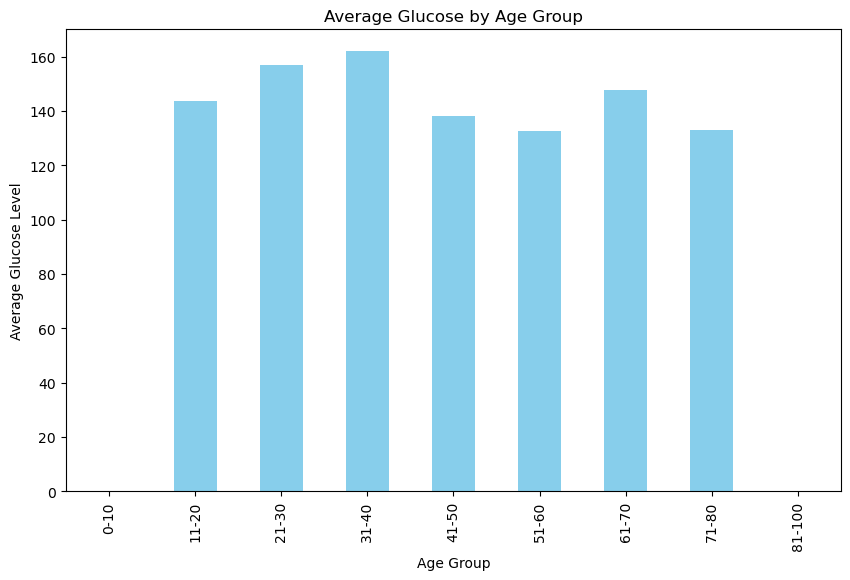

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Path to the already created CSV
patients_demo_path = r"C:\RemyaProjects2025\Python Hackathon2025\HUPA-UC Diabetes DatasetPATIENTS_WITH_DEMOGRAPHIC.csv"

# Read CSV
df = pd.read_csv(patients_demo_path)

# Ensure numeric
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['glucose'] = pd.to_numeric(df['glucose'], errors='coerce')

# Age groups
age_bins = [0,10,20,30,40,50,60,70,80,100]
age_labels = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-100']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Average glucose by age group (simplest)
avg_glucose_by_age = df.groupby('age_group', observed=False)['glucose'].mean().reset_index()
print(avg_glucose_by_age)

# Simple plot
avg_glucose_by_age.plot(kind='bar', x='age_group', y='glucose', color='skyblue', legend=False, figsize=(10,6))
plt.title("Average Glucose by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Glucose Level")
plt.show()


In [ ]:
#Q2 Impact of Carbohydrate Intake on Glucose Spikes
#Columns: glucose, carb_input
#Reason: Higher carb intake usually increases blood sugar levels.
#Goal: See how glucose changes with carb intake.


Average Glucose by Carbohydrate Intake Group:
  carb_group     glucose
0       0-20  119.875836
1      21-40  161.456140
2      41-60  134.083333
3      61-80   93.833333
4     81-100  145.957665
5    101-200  177.719907


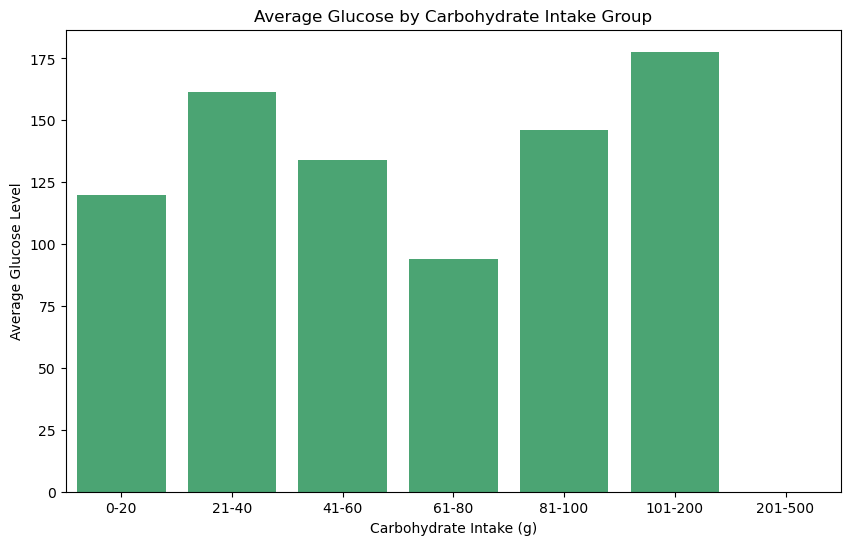

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Path to patients with demographic data
patients_demo_path = r"C:\RemyaProjects2025\Python Hackathon2025\HUPA-UC Diabetes DatasetPATIENTS_WITH_DEMOGRAPHIC.csv"

# Read CSV
df = pd.read_csv(patients_demo_path, sep=",")  # Use comma as delimiter

# Ensure relevant columns are numeric
df['glucose'] = pd.to_numeric(df['glucose'], errors='coerce')
df['carb_input'] = pd.to_numeric(df['carb_input'], errors='coerce')

# Create carbohydrate intake groups
carb_bins = [0, 20, 40, 60, 80, 100, 200, 500]
carb_labels = ['0-20','21-40','41-60','61-80','81-100','101-200','201-500']
df['carb_group'] = pd.cut(df['carb_input'], bins=carb_bins, labels=carb_labels)

# Calculate average glucose per carb group
avg_glucose_by_carb = df.groupby('carb_group', observed=True)['glucose'].mean().reset_index()
print("\nAverage Glucose by Carbohydrate Intake Group:")
print(avg_glucose_by_carb)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(
    x='carb_group',
    y='glucose',
    data=avg_glucose_by_carb,
    color='mediumseagreen',  # single color avoids warnings
    errorbar=None
)
plt.title("Average Glucose by Carbohydrate Intake Group")
plt.xlabel("Carbohydrate Intake (g)")
plt.ylabel("Average Glucose Level")
plt.show()

In [ ]:
#Q3 Correlation Between Physical Activity and Glucose
# Columns: glucose, steps
# Reason: Activity levels can help lower blood sugar.
# Goal: Determine if higher daily steps correspond to lower glucose levels.

Correlation between steps and glucose: 0.051


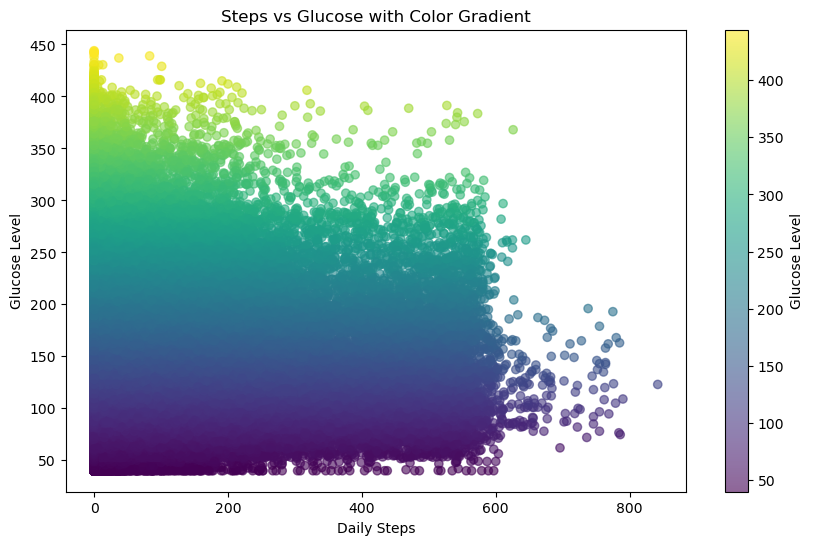

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read CSV
df = pd.read_csv(patients_demo_path, sep=",")  # Use comma as delimiter

# Ensure relevant columns are numeric
df['glucose'] = pd.to_numeric(df['glucose'], errors='coerce')
df['steps'] = pd.to_numeric(df['steps'], errors='coerce')

# Drop rows with missing values in glucose or steps
df_clean = df.dropna(subset=['glucose', 'steps'])

# Calculate correlation
correlation = df_clean['glucose'].corr(df_clean['steps'])
print(f"Correlation between steps and glucose: {correlation:.3f}")

# Scatter plot with color gradient
plt.figure(figsize=(10,6))
plt.scatter(df_clean['steps'], df_clean['glucose'], c=df_clean['glucose'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Glucose Level')
plt.xlabel("Daily Steps")
plt.ylabel("Glucose Level")
plt.title("Steps vs Glucose with Color Gradient")
plt.show()


In [ ]:
#Q4 Daily Average Glucose Levels
#Columns: glucose, time
#Reason: Blood sugar fluctuates throughout the day. Knowing daily averages helps understand overall control.
#Goal: See how average glucose changes day by day.

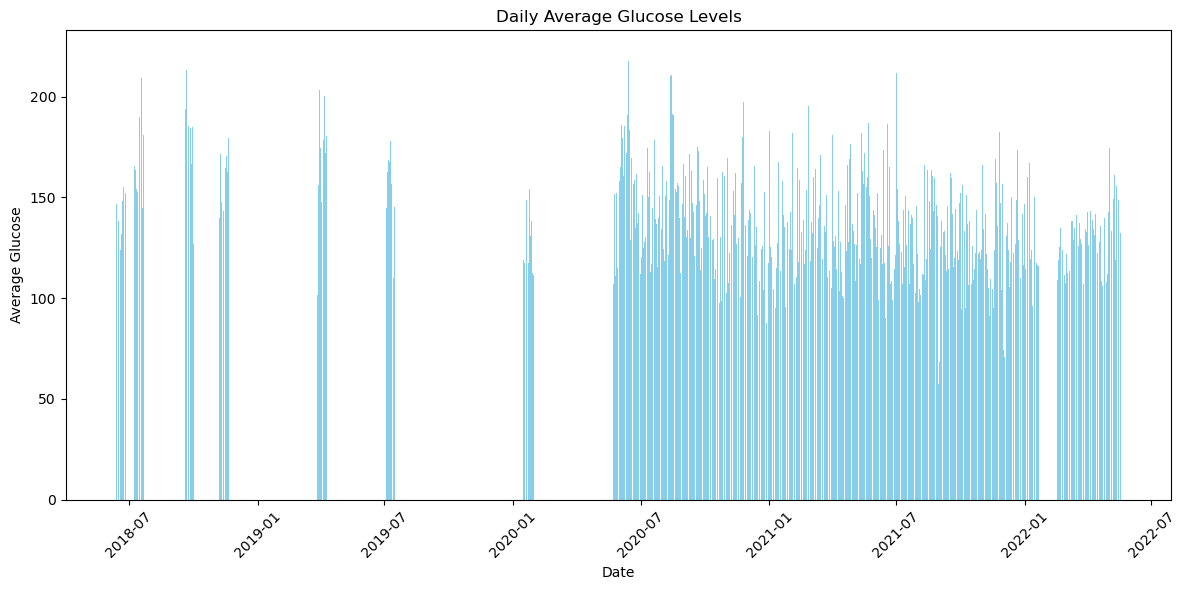

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(patients_demo_path, sep=",")

# Ensure glucose is numeric
df['glucose'] = pd.to_numeric(df['glucose'], errors='coerce')

# Convert 'time' to datetime
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%dT%H:%M:%S', errors='coerce')

# Extract date only
df['date'] = df['time'].dt.date

# Calculate daily average glucose
daily_avg = df.groupby('date')['glucose'].mean().reset_index()

# Plot
plt.figure(figsize=(12,6))
plt.bar(daily_avg['date'], daily_avg['glucose'], color='skyblue')
plt.title("Daily Average Glucose Levels")
plt.xlabel("Date")
plt.ylabel("Average Glucose")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Q5 How does sleep quality affect glucose levels?
#Columns: glucose, sleep_quality_score
#Reason: Poor sleep can affect blood sugar regulation; patients with lower sleep quality might have higher glucose levels.
#Goal: Determine if better sleep quality is associated with lower glucose levels, which can help guide lifestyle interventions.

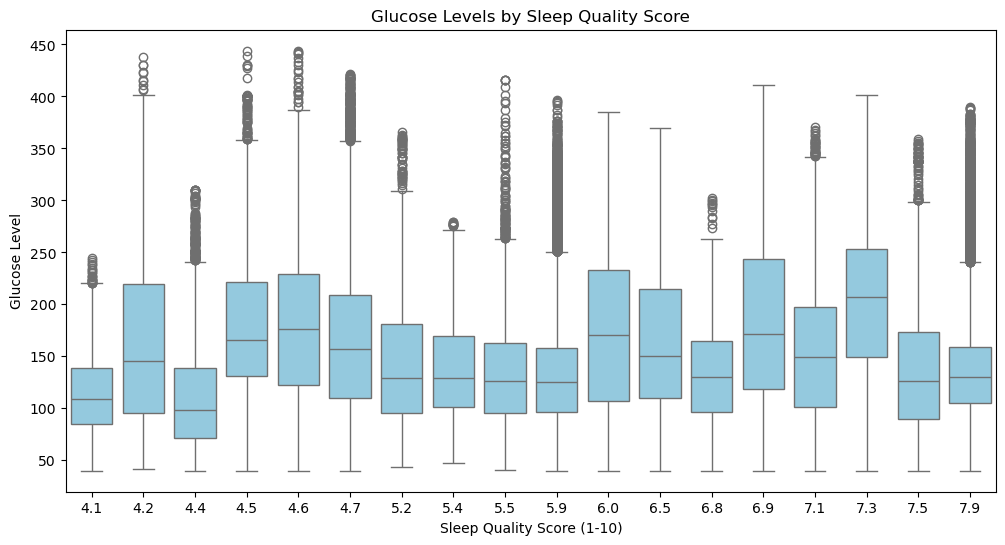

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Read CSV

df = pd.read_csv(patients_demo_path, sep=",")

# Ensure relevant columns are numeric
df['glucose'] = pd.to_numeric(df['glucose'], errors='coerce')
df['sleep_quality_score'] = pd.to_numeric(df['sleep_quality_score'], errors='coerce')

# Drop rows with missing values
df_clean = df.dropna(subset=['glucose', 'sleep_quality_score'])

# Box plot
plt.figure(figsize=(12,6))
sns.boxplot(x='sleep_quality_score', y='glucose', data=df_clean, color='skyblue')
plt.title("Glucose Levels by Sleep Quality Score")
plt.xlabel("Sleep Quality Score (1-10)")
plt.ylabel("Glucose Level")
plt.show()